### Data Engineering

In [1]:
# Add all the imports
import pandas as pd
import numpy as np

In [2]:
def map_idx(unique_attribute_vals: list):

    # Initialize the variables
    value_to_idx = {}
    idx_to_value = {}
    unique_int = 1

    # Loop through to map the values
    for value in unique_attribute_vals:
        value_to_idx[value] = unique_int
        idx_to_value[unique_int] = value
        unique_int = unique_int + 1

    # Return the two dictionaries
    return (value_to_idx, idx_to_value)

In [3]:
data_path = "input_data/NY-House-Dataset.csv"
all_data = pd.read_csv(data_path).dropna()

In [4]:
all_data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
# Get unique values for the columns listed below.
attribute_list = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME"]
attribute_idx_mapping = {}

for attribute in attribute_list:
    unique_attribute_values = all_data[attribute].unique()
    value_to_idx, idx_to_value = map_idx(unique_attribute_values)
    attribute_idx_mapping[attribute] = {"value_to_idx": value_to_idx, "idx_to_value": idx_to_value}
    all_data[attribute] = all_data[attribute].map(value_to_idx)

In [6]:
all_data.drop(columns=["ADDRESS", "MAIN_ADDRESS", "FORMATTED_ADDRESS", "LATITUDE", "LONGITUDE"], inplace=True)
all_data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME
0,1,1,315000,2,2.000000,1400.0,1,1,1,1,1,1
1,2,1,195000000,7,10.000000,17545.0,2,2,1,2,2,2
2,3,2,260000,4,2.000000,2015.0,3,2,1,3,3,3
3,4,1,69000,3,1.000000,445.0,4,2,1,2,2,4
4,5,3,55000000,7,2.373861,14175.0,5,2,1,2,2,5


### Train and Test Split

In [7]:
from sklearn.model_selection import train_test_split

# Get the y and x data in different variables
y_label = all_data["PRICE"]
X_data = all_data.drop(columns=["PRICE"])

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_data, y_label, test_size=0.3, random_state=43)

In [8]:
print(f"X Train Data Length = {len(train_X)} \t\t X Test Data Length = {len(test_X)} \n Y Train Data Length = {len(train_y)} \t\t Y Test Data Length = {len(test_y)}")

X Train Data Length = 3360 		 X Test Data Length = 1441 
 Y Train Data Length = 3360 		 Y Test Data Length = 1441


### Linear Regression Model

In [9]:
# import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set model
regression_model = LinearRegression()
# Fit model
regression_model.fit(train_X, train_y)

LinearRegression()

In [10]:
# Make predictions using the testing set
y_pred = regression_model.predict(test_X)

### Model Prediction Statistics

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of folds (k)
num_folds = 12  # You can adjust this based on your preference

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(regression_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 19229262394263.395
Coefficient of Determination (R-squared): -0.04099737071052001
Mean Absolute Error (MAE): 2300769.1772836903
Root Mean Squared Error (RMSE): 4385118.287374172
K-fold Cross-validated R-squared: -0.40885261114832394


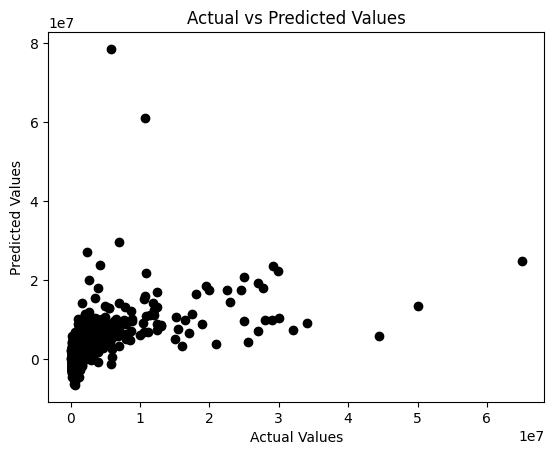

In [12]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()

In [13]:
coeff = pd.DataFrame(list(zip(regression_model.feature_names_in_, regression_model.coef_)), columns = ['Feature', 'Weight'])
coeff.sort_values('Weight')

,Feature,Weight
1,TYPE,-447945.905956
8,SUBLOCALITY,-404511.127237
2,BEDS,-279417.310430
6,ADMINISTRATIVE_AREA_LEVEL_2,-70733.503011
9,STREET_NAME,-2451.159312
10,LONG_NAME,-1091.541031
0,BROKERTITLE,-651.118482
4,PROPERTYSQFT,1475.728902
5,STATE,7973.866520
7,LOCALITY,130537.548784
